# XGBoost库实战
## XGBoost优点
1. 正则化：XGBoost模型的代价函数中包含有正则项，可以控制模型复杂度
2. 并行处理：对各个特征的增益计算是多线程进行的
3. 灵活性：自定义目标函数和评估函数，只需目标函数二阶可微
4. 缺失值处理：xgboost可以自动学习出缺失值特征的分裂方向
5. 剪枝：从顶到底建立所有可以建立的子树，再从底到顶反向进行剪枝

Accuracy: 96.67 % 


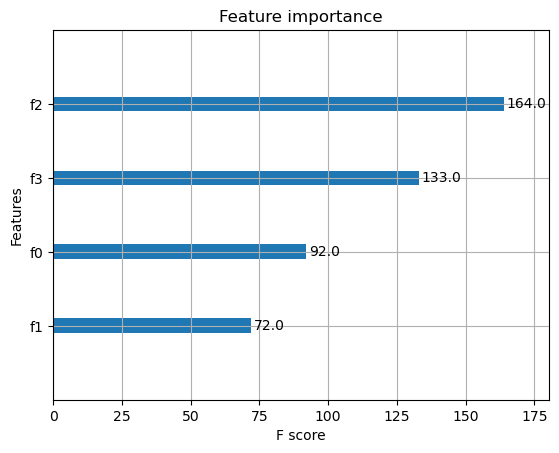

In [4]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
# 忽略Matplotlib的UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = list(params.items())


dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500

model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()